# **Face Recognition with Eigenface approach - *Python* codes**

---

*Marco Preziosi - Angela Sarnataro - Amina Valletta*

---
University of Naples "*Federico II*" - "*Numerical Methods for Data Analysis"* course - Professor *Salvatore Cuomo*


# **Abstract**

---

This project deals with face recognition problem on the *AT&T Database* of faces. The system functions by projecting face images onto a feature space that spans the significant variations among known face images of the database. The significant features are known as “eigenfaces”: they are the eigenvectors (principal components) of the set of faces. The projection operation characterizes a generic face by a weighted sum of the eigenface features, so to recognize a particular face it is necessary only to compare these weights to those of known people. The accuracy of the predictive algorithm used is evaluated by the precision and recall. All the algorithms are implemented in the Python programming language.

1. Introduction
2. Preliminary Theory
3. Eigenface Approach
4. Construction of the Eigenfaces space
5. Face Recognition
> 5.1.   Known people classification\
> 5.2.   Classification between unkown and known people
6. Conclusion
7. Bibliography





## ***1. Introduction***
---
The face recognition is a technique of matching a human face from a digital image against a database of faces.

Automatic face recognition is extracting meaningful features from an image, putting them into a useful representation, and performing a classification of that image.

This problem affects a variety of trades including security, such as facial identification for mobile devices or criminal identification, but also image processing and facial detection.

In addition, the approach is biologically implementable in medical trade for preliminary findings in the physiology and in psychology of face recognition.
Automatic face recognition initially focused on detecting individual features such as eyes, nose, mouth and head contour as marker points and defining a face model based on the Euclidean distance between marker points.

After that this operation was performed on a database of faces, each image in the initial database was associated with the list of these distances. During the recognition phase the same was done and the new set of distances was compared with the distance sets in the initial database to select the faces associated to most similar distances.

This approach has proved difficult to extend to multiple visualizations and has often been quite fragile, requiring a good initial guess to guide them; for this reason this *geometric method* was then replaced by more efficient techniques such as *Principal Component Analysis* **(PCA)** and *Linear Discriminant Analysis* **(LDA)** which offer advantages in terms of accuracy in facial recognition and computational costs and times.
With principal component analysis (PCA), also known as the Karhunen-Loève transform, any particular face can be represented economically in terms of a better coordinate system, initially called *“eigenpictures”*.

In 1991, starting from the study of Kirby and Sirovich, Turk and Pentland discovered that, using the eigenpictures technique, faces could be detected in images, in particular therefore the subject of a photograph could be traced back to that possibly present in a database initial with what they called *“autofaces”* or ***“eigenfaces”***.

The approach has advantages over other facial recognition methods in its speed and simplicity, insensitivity to small or gradual changes in the face image. It could be also used for algorithms that have learning and recognition ability on new faces in an unsupervised manner.


##***2. Preliminary Theory***

---

***2.1 Matrices and SVD***

Here are some definitions needed to deal with the following topic, assuming others.

**Definition 2.1** Let $A \in \mathbb{R} ^{n\times n}$ be a square *n*-dimensional real matrix, $ \lambda\in\mathbb{C}$ and $\underline{v}\in\mathbb{R} ^{n}-$ {$\underline{0}$}, so we'll define $\underline{v}$ an eigenvector of eigenvalue $\lambda$ for $A$, if $A\underline{v}=\lambda \underline{v}$ or equivalently if $\det(A-\lambda I)=0$.

**Proposition 2.1**  Let $X$ be a set and $(m, n)$ be a couple of positive integers. Let $A$ be a ${n\times m}$ -dimensional matrix with coefficients in $X$ and let $A^{T}$ be its transpose matrix. The product $AA^{T}$ is a $n$-order simmetric square matrix.

**Proposition 2.2** Let $A\in\mathbb{R}^{m\times n}$ be a matrix, let  $B\in\mathbb{R}^{m\times m}$ be a symmetric matrix and let $N\in\mathbb{R}$ such that $B=\frac{1}{N}AA^T$. Then $\underline{v}$ is an autovector of $B\Leftrightarrow$ $\underline{v}$ is an autovector of $AA^T$.

**Proposition 2.3** Let $A \in \mathbb{R} ^{m\times n}$ be a matrix. If $\underline{v}$ is an eigenvector of $A^{T}A$ then $A\underline{v}$ is an eigenvector of $AA^{T}$.

**Definition 2.2** Let $X=(\underline{X}_1,\underline{X}_2,\dots,\underline{X}_n)$ be a vector of aleatory variables with values in $\mathbb{R}^{n}$, we'll define the coviarance matrix $cov(X)$ as the one whose element of indices $i,j$ are given by$${cov(X)_{\underline{X}_i,\underline{X}_j}=\mathbb{E}[(\underline{X}_i-\mathbb{E}[\underline{X}_i])(\underline{X}_j-\mathbb{E}[\underline{X}_j])^T]}
$$where $\mathbb{E}[\underline{X}_i]$ represents the mean value, or expected value, of the variable $\underline{X}_i.$

When you have to deal with multidimensional data of great dimension, it is necessary to understand which is the subset of fundamental features to describe the phenomenon, distinguishing them from the insignificant ones. Among the feature reduction techniques, the most important are the *Singolar Value Decomposition (SVD)* and the *Principal Component Analysis (PCA)*, which are regarded in the following results.

**Theorem 2.1** Let $A \in \mathbb{R} ^{m\times n}$ be a matrix. Then there exist  two unitary matrices $U\in \mathbb{R}^{m \times m}$ , $V\in \mathbb{R}^{n \times n}$ and a diagonal matrix $\Sigma \in \mathbb{R}^{m \times n}$ with $\sigma _{i}\in\mathbb{R_+}$ on the diagonal with $\sigma_1 \geqslant\sigma_2 \geqslant \dots \sigma_n \geqslant 0$ such that $A$ can be factorized in this way:

$$A=U\Sigma V^{T}. $$
$\sigma_i$ are called *singular values*, the factorization is defined *singular value decomposition* **(SVD)** and the  columns of $U$ and the columns of $V$ are called the *left-singular vectors* and *right-singular vectors* of $A$, respectively.

**Definition 2.3** The *singular values* of the square matrix $A$ are equal to the square roots of the eigenvalues of $A^TA.$ 

***2.2 PCA***

*Principal Component Analysis* provides a method to efficiently represent a collection of sample points $x_i$, reducing the dimensionality of the description by projecting the points onto the principal axes, an orthonormal set of axes pointing in the directions of maximum covariance in the data. PCA minimizes the mean squared projection error for a given number of dimensions (axes), and provides a measure of importance (in terms of total projection error) for each axis.

Transforming a point to the new space is a linear transformation.
In order to compute the *principal components* you need to compute the average $\overline{x}$ of the $x_i$. 
The *principal components* can be compute finding the eigenvectors of the covariance matrix $C$, where

$$C=\displaystyle\sum_{i=1}^M x_i'{x'_i}^T=X'{X'}^T$$
with $x'_i=x_i-\overline{x}$.

An example of two dimensions PCA that makes this process evident is shown in *Figure 2.1*. It shows that the new "Component 1" axis is parallel to the variable that maximizes variance.






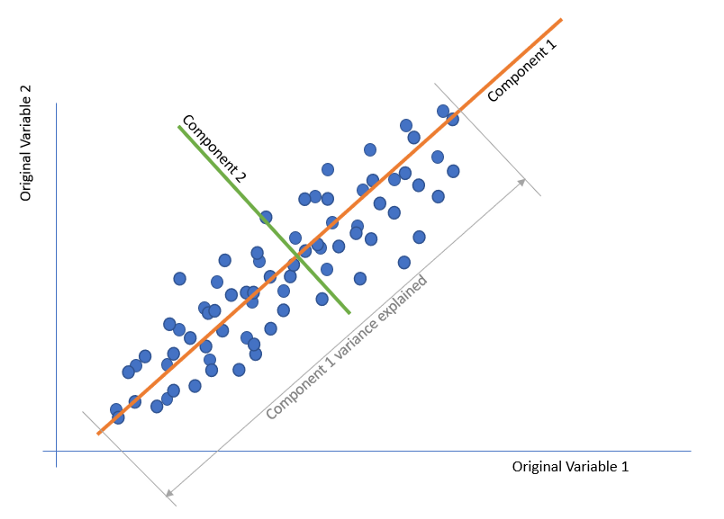 

**Figure 2.1:** 2-dimension PCA.

##**3. Eigenface Approach**

---

The goal is to **extract** from a face image **the most important information**, encode it as efficiently as possible and compare the encoding of a face to a database of similarly models.

In mathematical terms, the goal is finding *the principal components of the distribution of faces, or the eigenvectors of the covariance matrix* of the set of face images, using an image as a point (or vector) in a very high dimensional space.

The appropriately ordered eigenvectors represent the set of features that show the variation between face images; they are called **“eigenfaces”** and each face in the database can be represented by linear combination of the eigenfaces.

Each face can also be approximated by the "best" eigenfaces, that have the highest eigenvalues and therefore they represent the highest variance within the set of face images.

The best $k$ faces, generating a $k$-dimensional subspace, will be selected from all possible images and called *eigenspace*.

For this reason, to study the space of eigenfaces it is necessary to use *Principal Component Analysis (PCA)*.

The Eigenfaces method to perform face recognition works in this way:
1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor between the projected training images and the projected query
image.


##***4. Construction of the Eigenfaces space***
---
The database was used for this project is the *AT&T Facedatabase*, sometimes also known as *ORL Database of Faces*. It contains ten different images of each of 40 distinct subjects. For some subjects, the images were
taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling /
not smiling) and facial details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with tolerance for
some side movement). In a grayscale every pixel of an image is a integer number from 0 to 255. In this database each image is $112\times 92$ pixels in grayscale.\
At this early stage only 5 faces of each person were used, for a total of 200 faces. The other 200 were subsequently used.\
The following code shows the first image of the 40 people in the database and the 5 images of the 31th person.


In [ ]:
#this 3 lines is useful for mount all the data that we shared with you
#Before running, you have to download the data and upload in your "MyDrive"
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/Database_FaceRecognition"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#run this for delete a mounted file
!rm <file_name>.jpg


In [ ]:
#run this for delete a mounted folder
!rm -rf <folder_name>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `rm -rf <folder_name>'


In [ ]:
#run this for delete a mounted folder which has multiple folders
%rm -rf Database_FaceRecognition

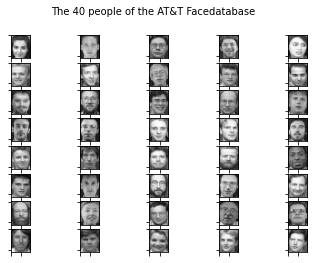

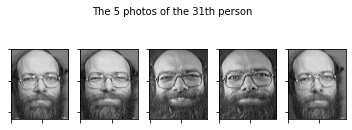

In [ ]:
import numpy as np
import PIL.Image as Image
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# function for reading the database
# input: path= database's path, sz= parameter for the possible reduction of the image dimension
# output: X=array of n matrices of dimensions [h,w], y=array of the n labels of the images
# the folder of the database must be divided into subfolders. Each subfolder must contain the various photos of the same person
def read_data(path, sz=None):
	c = 0
	X,y = [], []
    # os.walk creates a tree starting from the directory whose path is in the homonym variable
    # dirname will be this tree's root: database's directory
    # dirnames are the different subdirectories s1,s2,.. which represent different people
    # filenames are the singular images of every person 
	for dirname, dirnames, filenames in os.walk(path):
		for subdirname in dirnames:
            # changes the file's path by moving in the subdirectory
			subject_path = os.path.join(dirname, subdirname)
            # listdir is the list of the elements in the directory
			for filename in os.listdir(subject_path):
				try:
					im = Image.open(os.path.join(subject_path, filename))
					im = im.convert("L")
					# resize to given size (if given)
					if (sz is not None):
						im = im.resize(sz, Image.ANTIALIAS)
					X.append(np.asarray(im, dtype=np.uint8))
					y.append(c)
                # Management of any errors
				except IOError:
					sub_folder=1
				except:
					print ("Unexpected error:", sys.exc_info()[0])
					raise
			c = c+1
	return [X,y]

def create_font(fontname='Comic Sans MS', fontsize=10):
	return { 'fontname': fontname, 'fontsize':fontsize }

# function useful to create the plots of the people of the database
def subplot(title, images, rows, cols, sptitle="subplot", sptitles=[], colormap=cm.gray, ticks_visible=True, filename=None):
	fig = plt.figure()
	# main title
	fig.text(.5, .95, title, horizontalalignment='center') 
	for i in range(len(images)):
		ax0 = fig.add_subplot(rows,cols,(i+1))
		plt.setp(ax0.get_xticklabels(), visible=False)
		plt.setp(ax0.get_yticklabels(), visible=False)
		if len(sptitles) == len(images):
			plt.title("%s #%s " % (sptitle, str(sptitles[i])), create_font('Comic Sans MS',10))
		plt.imshow(np.asarray(images[i]), cmap=colormap)
	if filename is None:
		plt.show()
	else:
		fig.savefig(filename)
  
#read database
X,y=read_data(r'/content/Database_FaceRecognition/AT')

#plot of the people of the database
subplot(title="The 40 people of the AT&T Facedatabase", images=X[0:np.size(X,0):5], rows=8, cols=5, colormap=cm.gray, ticks_visible=True, filename=None)
subplot(title="The 5 photos of the 31th person", images=X[150:155], rows=2, cols=5, colormap=cm.gray, ticks_visible=True, filename=None)

In this case the dimensions are $n=112$, $m=92$, $N=200$.

In mathematical terms, each image is rapresented by a matrix $X_i\in\mathbb{R}^{n\times m}$ for $i=1,2,...,N$, in which each element rapresent a pixel of the image. So, the database is stored in the vector $X=(X_1,X_2,...,X_N)$.

In order to compute the eigenfaces, you need to follow this steps:

1. Vectorize the matrices $X_i$ into vectors $\Gamma_i\in\mathbb{R}^{n m}$;

2. Compute the mean face $\mu$:
$$\mu=\frac{1}N\displaystyle\sum_{i=1}^N \Gamma_i$$

3. Subtract the mean face from each face:
$$\Phi_i=\Gamma_i - \mu, \quad i=1,2,...,N$$
   Let be $A=(\Phi_1,\Phi_2,...,\Phi_N)\in\mathbb{R}^{nm\times N}$;  

4. Compute the covariance matrix C:
$$C=\frac{1}{N}\displaystyle\sum_{i=1}^{N} \Phi_i \Phi_i^T=\frac{1}{N}AA^T$$

5. Compute the eigenvalues $\lambda_i$ and the eingevectors $v_i$ of C;

6. Order the eigenvectors descending by their eigenvalue. The $k$ principal components are the eigenvectors corresponding to the $k$ highest eigenvalues.

The $k$ principal components of the covariance matrix are the eigenfaces. They carry the most unique features among the images of the database.

The following code shows the mean face and the first 16 eigenfaces. The eigenfaces look like ghosts and for this reason they are also called "*ghostfaces*".

**Computational advantage**: In the step 4. you compute the eigenvectors of $C=\frac{1}{N}AA^T$. In this case $nm>>N$, so $C$ is a $nm$-dimensional square matrix and the computational cost is high. But $C$ is the covariance matrix, therefore it is symmetrical. For this reason with the *proposition 2.2* you can look for its eigenvectors by looking for those in $AA^T$. For the *proposition 2.3* if $v$ is an $A^TA$ eigenvector then $Av$ is an eigenvector of $AA^T$, so you can find the eigenvector of $C$ by computing the eigenvectors of $A^TA$. This job has a lower computational cost because $A^TA$ is a $N$-dimensional square matrix.

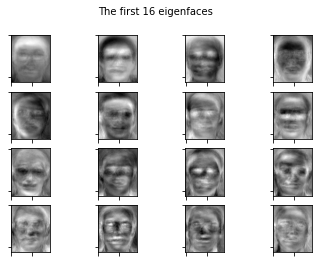

(<matplotlib.image.AxesImage at 0x7f995be5bf98>,
 Text(0.5, 1.0, "Mean face, called 'Robin Williams'"))

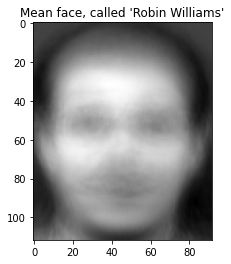

In [ ]:
#function useful to transform a matrix belonging to R^(h x w) in a vector belonging to R^(hw)
#input: array of matrices
#output: array of vectors
def asRowMatrix (X):
    if len (X) == 0:
        return np. array ([])
    mat = np. empty ((0 , X [0]. size ), dtype =X [0]. dtype )
    for row in X:
        mat = np. vstack (( mat , np. asarray ( row ). reshape (1 , -1)))
    return mat

#function useful to find the mean face and the first num_components eigenfaces
def pca (X, y, num_components):
    [n,d] = X.shape
    if ( num_components <= 0) or ( num_components >n):
        num_components = n
    mu = X. mean ( axis =0)
    X = X - mu
    if n>d:
        C = np. dot (X.T,X)
        [ eigenvalues , eigenvectors ] = np. linalg . eigh (C)
    else :
        C = np. dot (X,X.T)
        [ eigenvalues , eigenvectors ] = np. linalg . eigh (C)
        eigenvectors = np. dot (X.T, eigenvectors )
        for i in range (n):
            eigenvectors [:,i] = eigenvectors [:,i]/ np. linalg . norm ( eigenvectors [:,i])
    idx = np. argsort (- eigenvalues )
    eigenvalues = eigenvalues [idx ]
    eigenvectors = eigenvectors [:, idx ]
    # select only num_components
    eigenvalues = eigenvalues [0: num_components ]. copy ()
    eigenvectors = eigenvectors [: ,0: num_components ]. copy ()
    return [ eigenvalues , eigenvectors , mu]

#function useful to normalize a matrix with elements in a range between 0 and 255
def normalize (X, low , high , dtype = None ):
    X = np. asarray (X)
    minX , maxX = np. min (X), np. max (X)
    # normalize to [0...1].
    X = X - float ( minX )
    X = X / float (( maxX - minX ))
    # scale to [ low ... high ].
    X = X * (high - low )
    X = X + low
    if dtype is None :
        return np. asarray (X)
    return np. asarray (X, dtype = dtype )

# function useful to transform vectors into grayscale images
def vect2matrix(x,num_vect):
    E = []
    for i in range (min(len(X), num_vect)):
        e = x[:,i]. reshape (np.shape(X[0]))
        E.append(normalize(e ,0 ,255))
    return E
           

#take num_components eigenfaces
num_components=16
X_vect=asRowMatrix(X) 
eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components)

#plot eigenfaces
eigenfaces_matrix=vect2matrix(eigenfaces,num_components)
subplot(title="The first 16 eigenfaces", images=eigenfaces_matrix, rows=4, cols=4, colormap=cm.gray, ticks_visible=True, filename=None)

#plot mean face
mu=mu.reshape(np.shape(X[0]))
plt.imshow(mu,plt.cm.gray), plt.title("Mean face, called 'Robin Williams'")




The $k<N$ eigenfaces $v_1,v_2,...,v_k$ can be used to rappresent an approximation of the database's faces.

For example, let's focus on the reconstruction of the first face. For doing this, let's project the first face in the eigenfaces' space, where\
$$w_{i,1}=v_i^T\Phi_{1}=(v_{i_1},v_{i_2},...,v_{i_{nm}})\begin{pmatrix}\Phi_{1_1}\\\Phi_{1_2}\\.\\.\\.\\\Phi_{1_{nm}}\end{pmatrix}​​​​$$
with $i=1,...,k$.

$w_{i,1}$ is the $i$-coefficient of the first face's projection. The vector $W_1=(w_{1,1},w_{2,1},...,w_{k,1})$ is called *weights vector* of the first database's face.  
The first face can be reconstructed by a linear combination between the eigenfaces and its weights vector:
$$\Gamma^{rec}_{1}=\displaystyle\sum_{i=1}^k w_{i,1}v_i +\mu=w_{1,1}v_1+w_{2,1}v_2+...+w_{k,1}v_k+\mu.$$

When the number of autofaces increases, the accuracy in face reconstruction increases as you can see in the following code for the first face of the $31^{th}$ person.

You can note that if you take 30 eigenfaces the reconstruction is accurate enough to visually recognize the $31^{th}$ person, but you can see the image clearly by taking 50 or more autofaces.


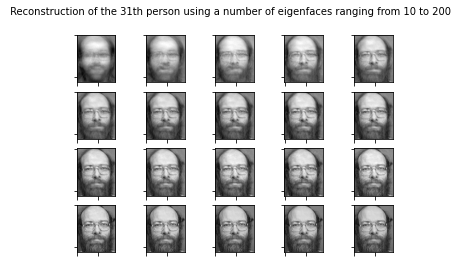

In [ ]:
#function useful to compute the vector of weights
def project (W, X, mu= None ):
    if mu is None :
        Weights=np.dot(X,W)
        return Weights
    Weights=np.dot(X - mu , W)
    return Weights

#function useful to reconstruct a face as combination of the eigenfaces and the vector of its weights
def reconstruct (W, Y, mu=None):
    if mu is None :
        return np. dot (Y,W.T)
    return np. dot (Y, W.T)+mu


#reconstruction of the 32th person using a number of eingenfaces ranging from 10 to 200
X_vect=asRowMatrix(X)
eigenvalues , eigenfaces , mu = pca (X_vect, y,0)
steps =[i for i in range (10 , len(X)+1 , 10)]
E = []
for i in range (len(steps)):
    numEvs = steps [i]
    P = project (eigenfaces[: ,0: numEvs ], X [150]. reshape (1 , -1) , mu)
    R = reconstruct (eigenfaces[: ,0: numEvs ], P, mu)
    # reshape and append to plots
    R = R. reshape (X [0]. shape )
    E. append ( normalize (R ,0 ,255) )
subplot ( title =" Reconstruction of the 31th person using a number of eigenfaces ranging from 10 to 200", images =E, rows =4, cols =5, colormap=cm.gray, ticks_visible=True, filename=None)



In the previous lines you have compared the different reconstructions as the number of eigenfaces' variation. However, your evaluation was subjective.

A mathematical parameter that you can use to measure the quality between a original and reconstructed image is the *Mean Square Error* (***MSE***).
The MSE is the cumulative squared error between the original image $A\in\mathbb{R}^{M \times N}$ and the reconstructed image $B\in\mathbb{R}^{M \times N}$:
$$MSE(A,B)=\frac{1}{MN}\displaystyle\sum_{i=0}^{M-1}\sum_{j=0}^{N-1} |A(i,j)-B(i,j)|^2$$

The lower the MSE, the better the quality of the reconstructed image.

The following code shows the MSE values of all the first faces of the 40 people using a number of eigenfaces equal to 50.


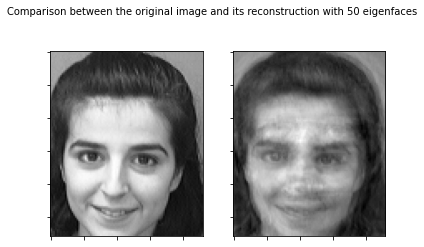

The MSE is  254.82181251952431




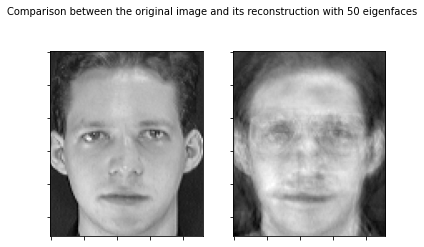

The MSE is  248.41488133741635




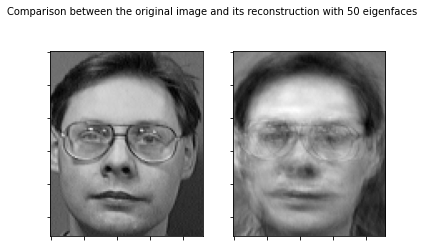

The MSE is  268.34945309214237




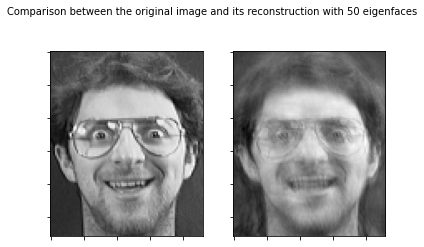

The MSE is  306.0175330556052




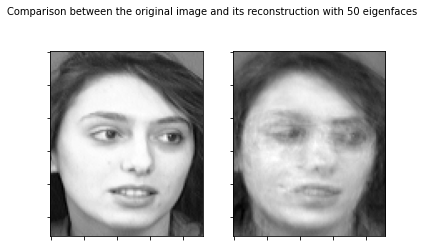

The MSE is  184.61733207166336




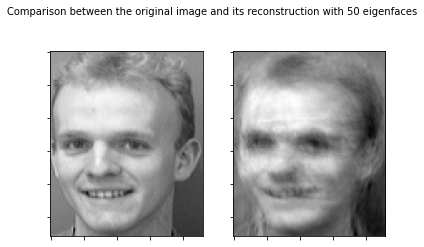

The MSE is  139.75172029007032




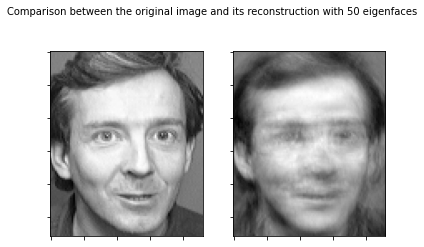

The MSE is  226.49514534480878




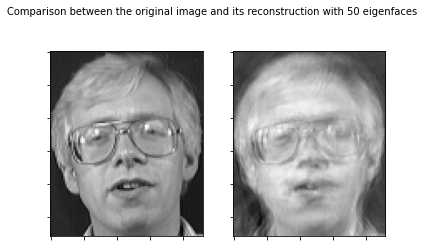

The MSE is  292.81576104659337




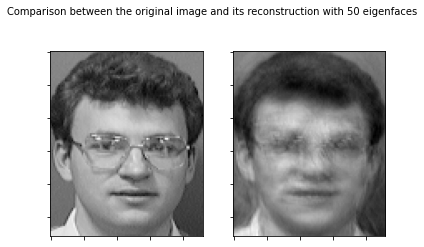

The MSE is  202.36013645583915




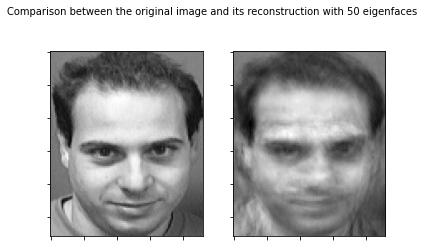

The MSE is  203.18565728498328




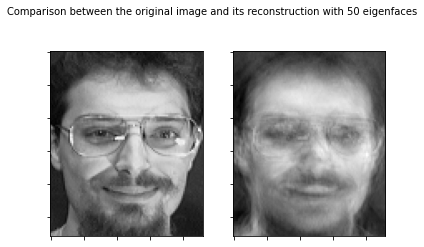

The MSE is  291.0594449577989




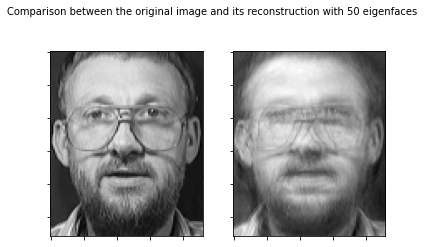

The MSE is  305.3523250914887




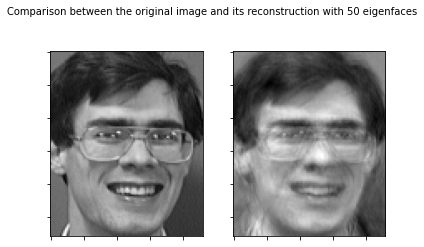

The MSE is  225.7393276481896




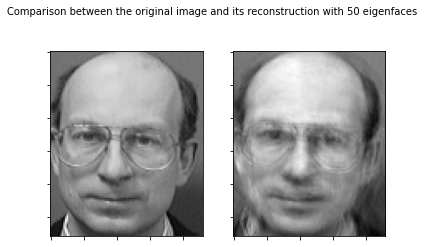

The MSE is  189.33814482770705




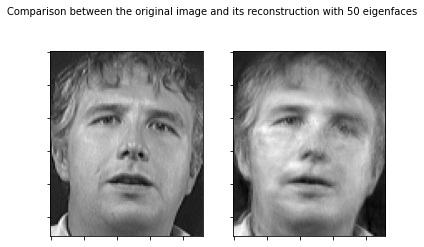

The MSE is  177.26659342766885




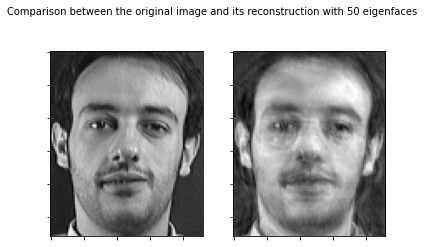

The MSE is  279.44316845363204




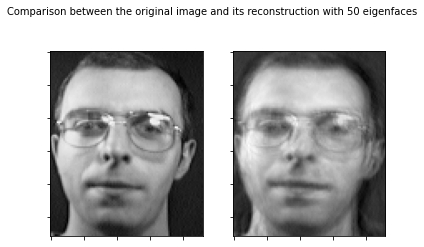

The MSE is  199.03119638880733




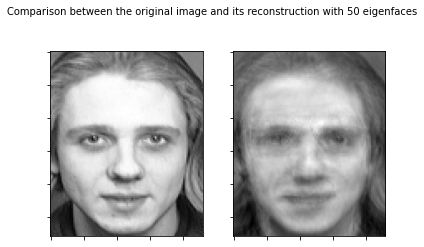

The MSE is  229.0048433461284




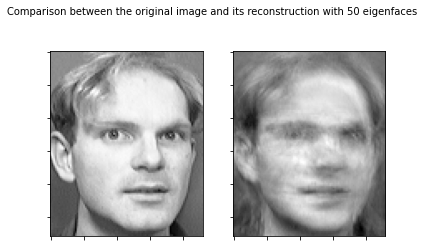

The MSE is  244.9028745003489




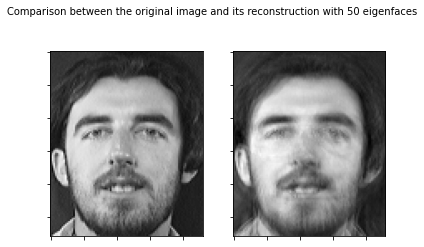

The MSE is  229.44069116157317




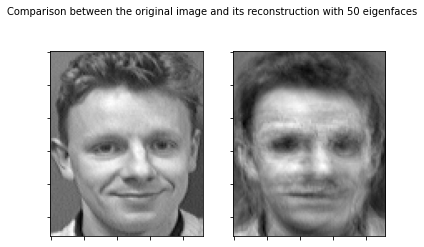

The MSE is  217.6475094764612




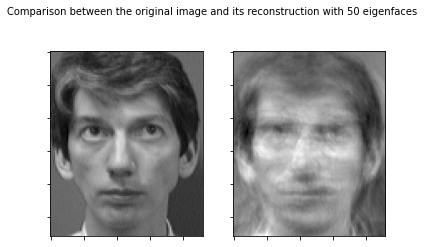

The MSE is  215.0914316731927




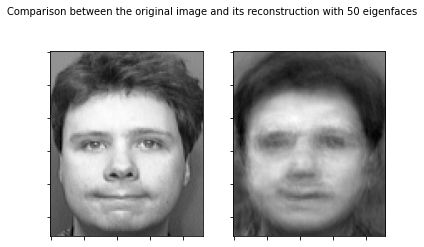

The MSE is  191.97249395030548




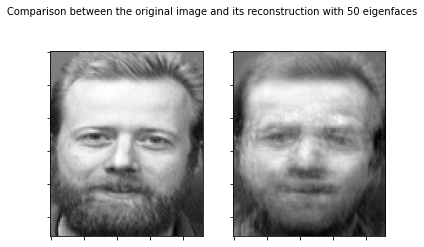

The MSE is  181.43770339540453




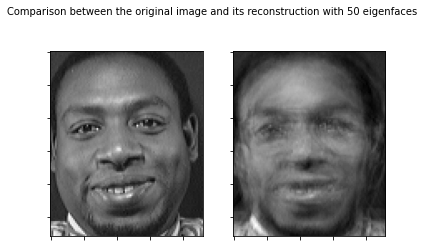

The MSE is  313.1833677388108




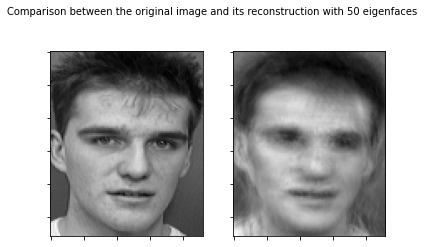

The MSE is  172.50334154821843




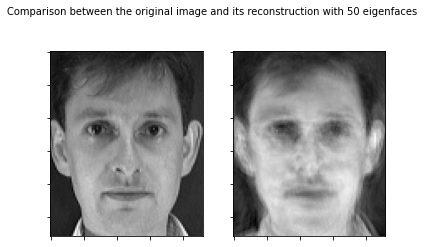

The MSE is  199.88499116873865




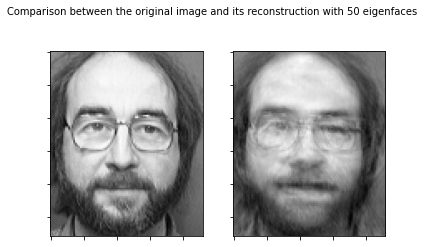

The MSE is  258.7565444256342




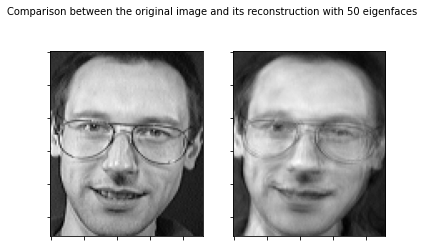

The MSE is  248.51427319195722




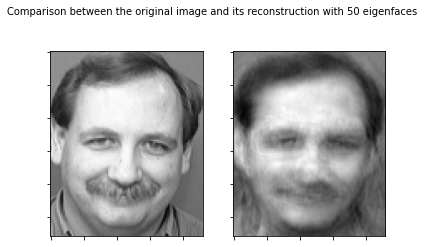

The MSE is  223.13706396009388




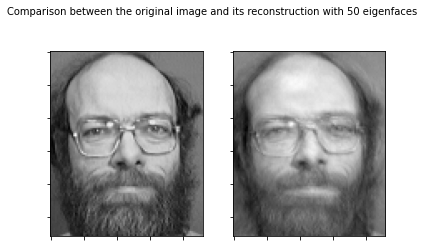

The MSE is  185.0123656914127




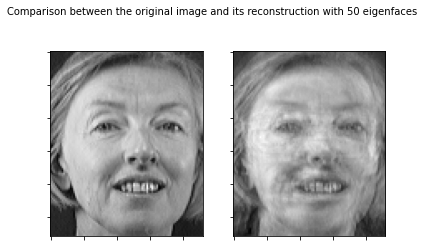

The MSE is  266.9197788646302




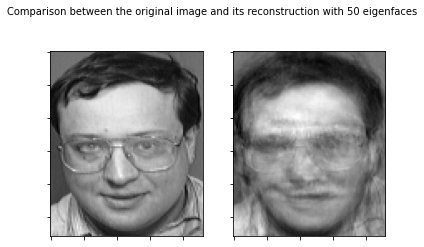

The MSE is  265.088325583689




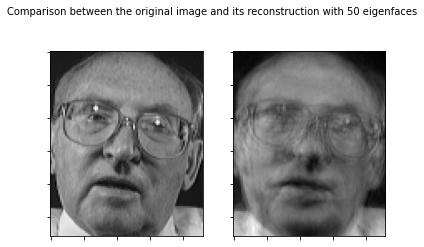

The MSE is  358.8437897002023




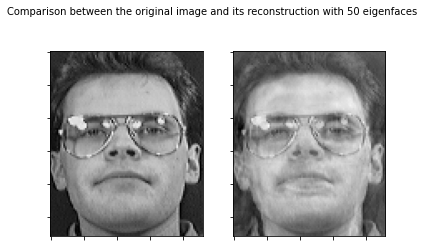

The MSE is  215.6384485320385




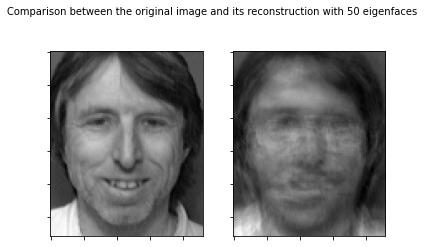

The MSE is  225.47654414896203




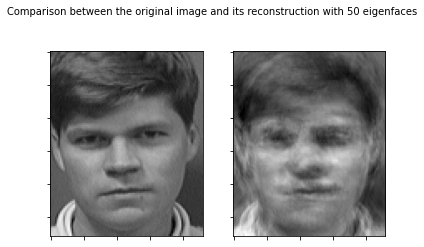

The MSE is  289.24230506208477




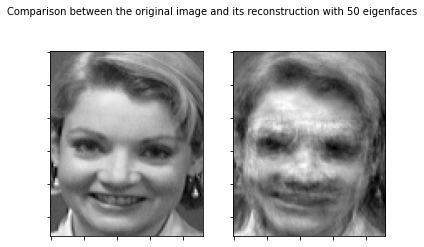

The MSE is  245.1840533852041




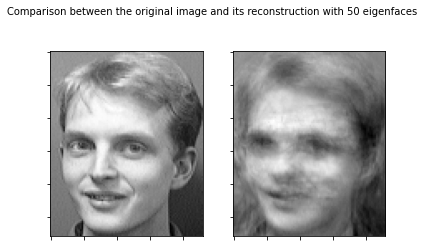

The MSE is  224.95369310325108




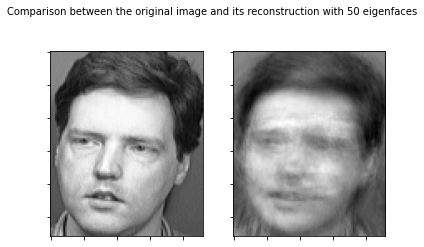

The MSE is  233.86894224891103




In [ ]:
#function useful to create the projection matrix of the images of the Database using num_components eigenfaces
def Weight_mat(eigenfaces,X_vect,mu=None):
    CP=np.array([])
    for i in range(np.size(X,0)):
        Weights=project(eigenfaces, X_vect[i].reshape(1,-1), mu)
        CP=np.append(CP,Weights)
    CP=CP.reshape(np.size(X,0),np.size(eigenfaces,1))
    return CP

# function useful to comput the minumum square error for two matrices
def mse(A,B):
    D=np.abs(A-B)
    D=D**2
    D=np.array(D)
    MSE=(sum(sum(D)))/np.size(D)
    return MSE
     

#take num_components eigenfaces
num_components=50
X_vect=asRowMatrix(X)
eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components)

#compute the projection matrix
CP=Weight_mat(eigenfaces,X_vect,mu)
   
#compute the MSE of the first image of the 40 people and comparison between the original image and its reconstruction
h = np.size(X[0],0)
w = np.size(X[0],1)
for s in range(0,np.size(X,0),5):       
     rec=reconstruct(eigenfaces, CP[s], mu)
     MSE=mse(rec.reshape(h,w),X[s])
     A=[X[s],rec.reshape(h,w)]
     subplot(title="Comparison between the original image and its reconstruction with 50 eigenfaces", images=A, rows=1, cols=2, colormap=cm.gray, ticks_visible=True, filename=None)
     print("The MSE is ", MSE)
     print("\n")     

The following code shows the MSE values of the first face of the $31^{th}$ person as the number of eigenfaces' variation. You can see the decrease of the MSE values, when the eigenfaces increase, and their convergence to 0.

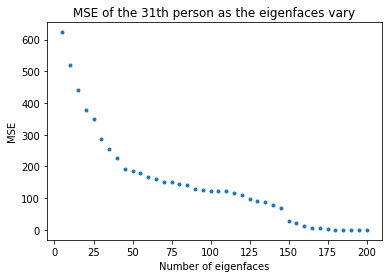

In [ ]:
#take all the eigenfaces
X_vect=asRowMatrix(X)
eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components = 0)

#MSE 31th person as the eigenfaces vary
steps =[i for i in range (5 , len(X)+1 , 5)]
E = [X[150]]
D=[]
for i in range (len(steps)):
    numEvs = steps [i]
    P = project (eigenfaces[: ,0: numEvs ], X[150]. reshape (1 , -1) , mu)
    R = reconstruct (eigenfaces[: ,0: numEvs ], P, mu)
    MSE=mse(R,X_vect[150])
    D.append(MSE)

a=np.linspace(5,len(X),len ( steps ))
plt.title("MSE of the 31th person as the eigenfaces vary") 
plt.xlabel("Number of eigenfaces") 
plt.ylabel("MSE") 
plt.plot(a,D,'.') 
plt.show()

# ***5. Face Recognition***
---
This section shows how eigenfaces can be used for the problem of face recognition.

***5.1 Known people classification***

The half part of the images of *AT&T Facedatabase*, not used so far, are udes now for face recognition. Like in the first database's part, there are 200 faces with 5 images for each 40 people, that are collected in $Y$ set.

The goal is to create a predictive algorithm such that, if you give in input any face of $Y$, it classifies the face into the correct person.

Previously thanks to the projection of the initial database images in the eigenfaces' space, you actually study their position in the new coordinate system.

Let $Y_j$ be a generic face of $Y$ set, let $\Delta_j$ be $Y_j$ vectorized and let $\Psi_j=\Delta_j-\mu$ be the subtracted vector.

Let's  project $\Psi_j$ in the eigenfaces' space:

$$\omega_{i,j}=v_i^T\Phi_{j}=(v_{i_1},v_{i_2},...,v_{i_{nm}})\begin{pmatrix}\Psi_{j_1}\\\Psi_{j_2}\\.\\.\\.\\\Psi_{j_{nm}}\end{pmatrix}​​​​$$
with $i=1,...,k$ and $v_1,v_2,...,v_k$ the eigenfaces.

Let $\Omega=(\omega_{1,j},\omega_{2,j},...,\omega_{k,j})$ be weights vector of $\Psi_j$.

Now let's compute the minimum distance between $\Omega_j$ and the weights vectors $W_l$ with $l=1,...,200$ of the 200 faces of the first half part of the database:

$$\epsilon_j=\min_{1\le l\le 200} ||\Omega_j-W_l||^2.$$
You can understand, therefore that the $Y_j$ face is the nearest to $X_s$ where
$$s=\underset{1\le l\le 200}{\operatorname{argmin}}||\Omega_j-W_l||^2.$$
A predictive algorithm based on this method, called *Nearest Neighbor*, will predict that $Y_j$ is the face of the person corrisponding to the face $X_s$.

The following code shows the prediction of three images of $Y$ set using a number of eigenfaces equal to 16. You can note that the algorithm works wrong on the third input face.



The minimum distance calculated is:  558.347457656985
The image is a picture of the individual: s 32


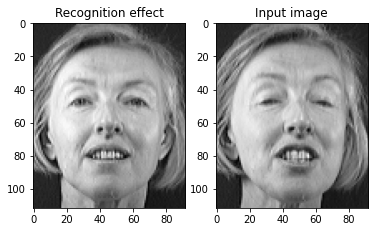



The minimum distance calculated is:  1857.1143633028762
The image is a picture of the individual: s 3


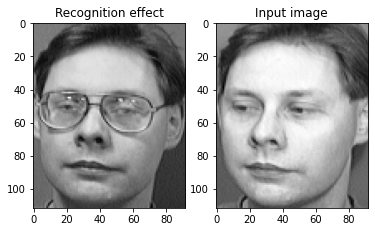



The minimum distance calculated is:  2350.6022800042438
The image is a picture of the individual: s 11


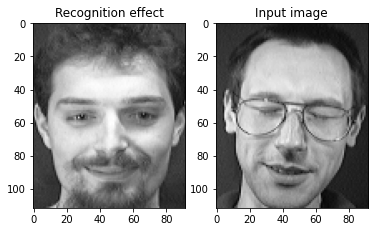

In [ ]:
#function for the computation of the Euclidean distance
def distance(P,Q):
    n=np.size(P)
    d=0
    for k in range(n):
        d=d+(P[k]-Q[k])**2
    d=np.sqrt(d)
    return d


#take the first num_components eigenfaces
X_vect=asRowMatrix(X)
eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components = 16)

#create CP
CP=Weight_mat(eigenfaces,X_vect,mu) 

#take im1
im1=Image.open(r'/content/Database_FaceRecognition/DKnownTest/S_new/s32/6.pgm')
U=[]
try:
    im1 = im1.convert("L")
    U.append(np.asarray(im1, dtype=np.uint8))
    # Management of any errors
except IOError:
	sub_folder=1
except:
	print ("Unexpected error:", sys.exc_info()[0])
	raise
U=np.array(U[0])
U=U.reshape(1 , -1)

#compute the weight vector of new image
NP=project(eigenfaces, U, mu)

#compute the minimum distance from new image and all the images of the database
d=np.zeros(np.size(X,0))
for i in range(np.size(X,0)):
    d[i]=distance(NP[0],CP[i,:])
dmin=np.amin(d)
index=np.argmin(d)
print("\n")
print("The minimum distance calculated is: ", dmin)
print("The image is a picture of the individual: s", int(index/5)+1)
    
plt.figure();
plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
plt.subplot(122),plt.imshow(im1, plt.cm.gray),plt.title('Input image')
plt.show()         


#take im2
im2=Image.open(r'/content/Database_FaceRecognition/DKnownTest/S_new/s04/6.pgm')
U=[]
try:
    im2 = im2.convert("L")
    U.append(np.asarray(im2, dtype=np.uint8))
    # Management of any errors
except IOError:
	print ("I/O error({0}): {1}")
except:
	print ("Unexpected error:", sys.exc_info()[0])
	raise
U=np.array(U[0])
U=U.reshape(1 , -1)

#compute the weight vector of new image
NP=project(eigenfaces, U, mu)

#compute the minimum distance from new image and all the images of the database
d=np.zeros(np.size(X,0))
for i in range(np.size(X,0)):
    d[i]=distance(NP[0],CP[i,:])
dmin=np.amin(d)
index=np.argmin(d)
print("\n")
print("The minimum distance calculated is: ", dmin)
print("The image is a picture of the individual: s", int(index/5)+1)
    
plt.figure();
plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
plt.subplot(122),plt.imshow(im2, plt.cm.gray),plt.title('Input image')
plt.show()  


#take im3
im3=Image.open(r'/content/Database_FaceRecognition/DKnownTest/S_new/s27/6.pgm')
U=[]
try:
    im3 = im3.convert("L")
    U.append(np.asarray(im3, dtype=np.uint8))
    # Management of any errors
except IOError:
	print ("I/O error({0}): {1}")
except:
	print ("Unexpected error:", sys.exc_info()[0])
	raise
U=np.array(U[0])
U=U.reshape(1 , -1)

#compute the weight vector of new image
NP=project(eigenfaces, U, mu)

#compute the minimum distance from new image and all the images of the database
d=np.zeros(np.size(X,0))
for i in range(np.size(X,0)):
    d[i]=distance(NP[0],CP[i,:])
dmin=np.amin(d)
index=np.argmin(d)
print("\n")
print("The minimum distance calculated is: ", dmin)
print("The image is a picture of the individual: s", int(index/5)+1)
    
plt.figure();
plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
plt.subplot(122),plt.imshow(im3, plt.cm.gray),plt.title('Input image')
plt.show()  

The following code shows the variation of the prediction's success rate with the increase of the number of the eigenfaces.

In the first plot the number of the eigenfaces ranges between 10 and 190 with step of 20, while in the second plot the number of the eigenfaces ranges between 25 and 50 with step of 2. You can see that from 37 eigenfaces the algorithm has a 92% success rate. There is an improvement in the success rate from at least 130 eigenfaces, but it is not convenient in computational cost point of view.

In [ ]:
#read another database of different phots of the known people
Y,yi=read_data(r'/content/Database_FaceRecognition/DKnownTest')

X_vect=asRowMatrix(X)
success_rate_vect=[]
for num_components in range(10,len(X)+1,20):
    #take the first num_components eigenfaces
    eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components)
    #create CP
    CP=Weight_mat(eigenfaces,X_vect,mu) 
    rec_good=0
    rec_bad=0
    for j in range(np.size(Y,0)):
        U=Y[j]
        U=U.reshape(1 , -1)
        #compute the weight vector of new image
        NP=project(eigenfaces, U, mu)
        #compute the minimum distance from new image and all the images of the database
        d=np.zeros(np.size(X,0))
        for i in range(np.size(X,0)):
            d[i]=distance(NP[0],CP[i,:])
        dmin=np.amin(d)
        index=np.argmin(d)   
        #count good and bad recognition and compute the success rate
        if int(index/5)+1==yi[j]:
            rec_good=rec_good+1
        else:
            rec_bad=rec_bad+1
        success_rate=rec_good/(rec_good+rec_bad)
    success_rate_vect.append(success_rate)
a=list(range(10,len(X)+1,20))
plt.title("Success rate classification known people in different photos as the eigenfaces vary") 
plt.xlabel("Number of eigenfaces") 
plt.ylabel("Success_rate") 
plt.plot(a,success_rate_vect,'.') 
plt.show()

success_rate_vect=[]
for num_components in range(25,51,2):
    #take the first num_components eigenfaces
    eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components)
    #create CP
    CP=Weight_mat(eigenfaces,X_vect,mu) 
    rec_good=0
    rec_bad=0
    for j in range(np.size(Y,0)):
        U=Y[j]
        U=U.reshape(1 , -1)
        #compute the weight vector of new image
        NP=project(eigenfaces, U, mu)
        #compute the minimum distance from new image and all the images of the database
        d=np.zeros(np.size(X,0))
        for i in range(np.size(X,0)):
            d[i]=distance(NP[0],CP[i,:])
        dmin=np.amin(d)
        index=np.argmin(d)   
        #count good and bad recognition and compute the success rate
        if int(index/5)+1==yi[j]:
            rec_good=rec_good+1
        else:
            rec_bad=rec_bad+1
        success_rate=rec_good/(rec_good+rec_bad)
    success_rate_vect.append(success_rate)
a=list(range(25,51,2))
plt.title("Success rate classification known people in different photos as the eigenfaces vary") 
plt.xlabel("Number of eigenfaces") 
plt.ylabel("Success_rate") 
plt.plot(a,success_rate_vect,'.') 
plt.show()

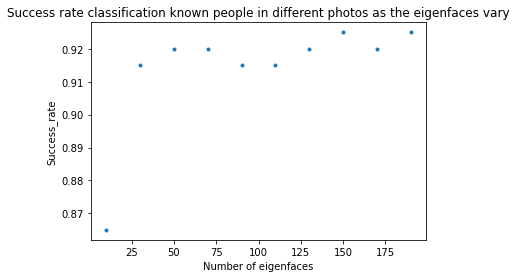

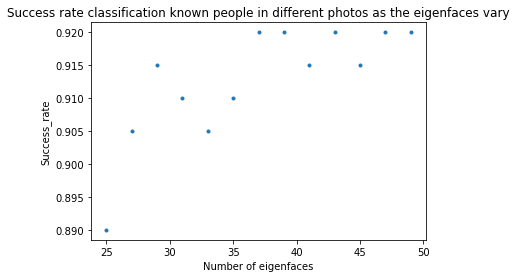

***5.2 Classification between unkown and known people***

Let $X$ be the first half part of the *AT&T Facedatabase* used to construct the eingenfaces' space and $Y$ be its second half part: they are the "known people".

Let $Z$ be a set of 80 images not present in the database. In this set there are 20 different people, 4 images for each one. They are the "unknown people".

The goal is to create a predictive algorithm such that, if you give in input any face $F$ of $Y\cup Z$, it outputs if $F$ is a known or unknown people.

Henceforth, given a face , its weights vector means the weights vector of vectorized face minus the mean face.

For understanding if $F$ is present or not in the database, you have to consider its projection into eigenfaces' space and compute all the distances from the projections of the faces of $X$. In case $F$ is enough close to one of the faces of $X$, recognition takes place and the algorithm classifies $F$ as a known person. Otherwise, in case $F$ is far from all faces of $X$, the algorithm classifies $F$ as a unknown person.

The transition from "close" to "far" is rapresented by the *threshold value $\theta$.* The estimation of $\theta$ is made in this way: 

1. Compute the minimum distance $\epsilon_i$ between the weights vector of $Y_i$ and all the weights vectors of $X$, for $i=1,2,\dots,200$. Then compute  $\theta_1= \displaystyle\max_{1\le i\le 200} {ϵ_i} $;  \
2.  Compute the minimum distance $\eta_j$ between the weights vector of $Z_j$ and all the weights vectors of $X$, for $j=1,2,\dots,80$. Then compute  $\theta_2= \displaystyle\min_{1\le j\le 80} {\eta_j} $;  \
3. At the end, compute the average\
$$\theta=\frac{\theta_1+\theta_2}{2}.$$

The following code compute the average $\theta$, using a number of 16 eigenfaces.

In [ ]:
#function useful to compute the minimum distance from new image U and all the images of the database
def min_distance_newimage(U,mu,eigenfaces,CP):
    U=U.reshape(1,-1)
    NP=project(eigenfaces, U, mu)
    d=np.zeros(np.size(X,0))
    for i in range(np.size(X,0)):
        d[i]=distance(NP[0],CP[i,:])
    dmin=np.amin(d)
    index=np.argmin(d)
    return dmin,index,NP

#function useful to compute thetamin e thetamax        
def theta(Imm,mu,eigenfaces,CP,flag=None):
    # Imm is a list of matrices of the images 
    # if flag==None only essential values thetamin e thetamax are returned
    # otherwise all the indexes are returned in output
    n=np.size(Imm,0)
    all_dist=[]
    all_index=[]
    j=0
    while(j<n):
        dmin,index,NP=min_distance_newimage(Imm[j],mu,eigenfaces,CP)
        all_dist.append(dmin)
        all_index.append(index)
        j=j+1
    thetamin=np.amin(all_dist)
    thetamax=np.amax(all_dist)
    if(flag==None):
        return thetamin,thetamax
    else:
        return thetamin,thetamax,all_dist,all_index


#take num_components eigenfaces
X_vect=asRowMatrix(X)
eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components =16)

#take the 2 databases that we need to compute theta
user_path=[]

user_path.append("/content/Database_FaceRecognition/DKnownTest")
user_path.append("/content/Database_FaceRecognition/DFaceNotKnownTheta")

#compute the projection matrix
CP=Weight_mat(eigenfaces,X_vect,mu)
 
#compute theta
thetamin=np.zeros(2)
thetamax=np.zeros(2)
for i in range(2):
    [Y,y]=read_data(user_path[i])
    Y_vect=asRowMatrix(Y)
    thetamin[i],thetamax[i],all_dist,all_index=theta(Y,mu,eigenfaces,CP,1)
    
THETA=(thetamax[0]+thetamin[1])/2

print("\n Theta =",THETA)


 Theta = 2439.7867512551547


The following code shows the plot of $\theta$ as a function of the numbers of eigenfaces. $\theta$, like the distances between the faces, increses with the increasing of the number of eigenfaces. This happens because the images become more and more detailed.


the vector of the theta is [2049.300709268983, 2865.825759086685, 3067.189673512772, 3273.4584281577468, 3389.8254218367374, 3502.561601762695, 3580.942989348447, 3622.034215493821, 3663.290818745763, 3704.756645844287]


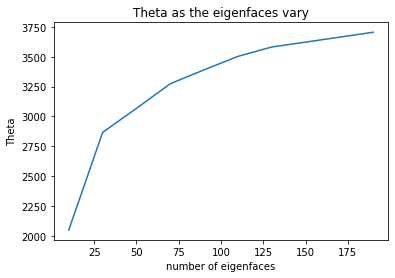

In [ ]:
#take the 2 databases that we need to compute theta
user_path=[]
user_path.append("/content/Database_FaceRecognition/DKnownTest")
user_path.append("/content/Database_FaceRecognition/DFaceNotKnownTheta")

X_vect=asRowMatrix(X)
theta_vect=[]
for num_components in range(10,len(X)+1,20):
    
    #take num_components eigenfaces
    eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components) 
    
    #compute the projection matrix
    CP=Weight_mat(eigenfaces,X_vect,mu)

    #compute theta
    thetamin=np.zeros(2)
    thetamax=np.zeros(2)
    for i in range(2):
        [W,yi]=read_data(user_path[i])
        W_vect=asRowMatrix(W)
        thetamin[i],thetamax[i],all_dist,all_index=theta(W,mu,eigenfaces,CP,1)
    THETA=(thetamax[0]+thetamin[1])/2
    theta_vect.append(THETA)


print('the vector of the theta is',theta_vect)

a=list(range(10,len(X)+1,20))

   
plt.title("Theta as the eigenfaces vary") 
plt.xlabel("number of eigenfaces") 
plt.ylabel("Theta") 
plt.plot(a,theta_vect) 
plt.show()

After the choice of the value $\theta$, let's describe better now how prediction algorithm works for the input face $F\in Y\cup Z$.

Let $\epsilon=\min_{1\le i\le 200} ||\Omega-W_i||^2$ be the minimum distance between $\Omega=(\omega_1,...,\omega_k)$, the weights vector of $F$, and $W_i=(w_{1,i},...,w_{k,i})$, for $i=1,...,200$, the weights vectors of $X$.

Then
*  if $\epsilon<\theta$ then the algorithm recognizes $F$ as a known person;
*  if $\epsilon\ge\theta$ then the algorithm recognizes $F$ as a unknown person.

The following code works with a number of 16 eigenfaces and $\theta=2439.7867512551547$, computed in the previous code. For the first input it predicts in the right way the known person; for the second input it predicts in the right way the unknown person; for the third input it predicts in the wrong way the unknown person, identifing him as a known person.



The minimum distance calculated is:  1889.1483577760814
The image has been recognised as one of the database,
in particular it has been classified as a picture of the person: s 33


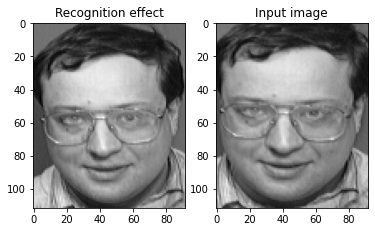



The minimum distance calculated is:  3043.7584742614176
The image has been recognised as one of a face absent in the database.


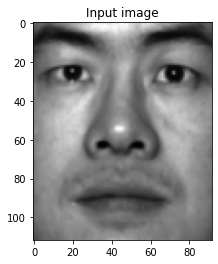



The minimum distance calculated is:  2316.1891926985063
The image has been recognised as one of the database,
in particular it has been classified as a picture of the person: s 25


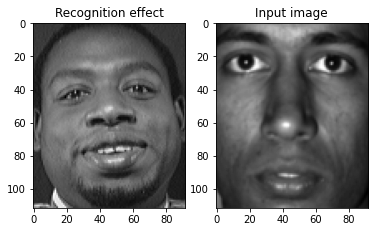

In [ ]:
#take the first num_components eigenfaces
X_vect=asRowMatrix(X)
eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components = 16)

#create CP
CP=Weight_mat(eigenfaces,X_vect,mu) 

#chose theta
THETA=2439.7867512551525

#take im1
im1=Image.open(r'/content/Database_FaceRecognition/DKnownTest/S_new/s31/6.pgm')
U=[]
try:
    im1 = im1.convert("L")
    U.append(np.asarray(im1, dtype=np.uint8))
    # Management of any errors
except IOError:
	print ("I/O error({0}): {1}")
except:
	print ("Unexpected error:", sys.exc_info()[0])
	raise
U=np.array(U[0])
U=U.reshape(1 , -1)

#compute the weight vector of new image
NP=project(eigenfaces, U, mu)

#compute the minimum distance from new image and all the images of the database
d=np.zeros(np.size(X,0))
for i in range(np.size(X,0)):
    d[i]=distance(NP[0],CP[i,:])
dmin=np.amin(d)
index=np.argmin(d)
print("\n")
print("The minimum distance calculated is: ", dmin)


if (dmin<THETA):
    print("The image has been recognised as one of the database,")
    print("in particular it has been classified as a picture of the person: s", int(index/5)+1)
    
    plt.figure();
    plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
    plt.subplot(122),plt.imshow(im1, plt.cm.gray),plt.title('Input image');
    plt.show()           
else:
    print("The image has been recognised as one of a face absent in the database.")
    plt.figure();
    plt.imshow(im1, plt.cm.gray),plt.title('Input image');
    plt.show()

#take im2   
im2=Image.open(r'/content/Database_FaceRecognition/DFaceNotKnownTheta/S/7.pgm')
U=[]
try:
    im2 = im2.convert("L")
    U.append(np.asarray(im2, dtype=np.uint8))
    # Management of any errors
except IOError:
	print ("I/O error({0}): {1}")
except:
	print ("Unexpected error:", sys.exc_info()[0])
	raise
U=np.array(U[0])
U=U.reshape(1 , -1)

#compute the weight vector of new image
NP=project(eigenfaces, U, mu)

#compute the minimum distance from new image and all the images of the database
d=np.zeros(np.size(X,0))
for i in range(np.size(X,0)):
    d[i]=distance(NP[0],CP[i,:])
dmin=np.amin(d)
index=np.argmin(d)
print("\n")
print("The minimum distance calculated is: ", dmin)


if (dmin<THETA):
    print("The image has been recognised as one of the database,")
    print("in particular it has been classified as a picture of the person: s", int(index/5)+1)
    
    plt.figure();
    plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
    plt.subplot(122),plt.imshow(im2, plt.cm.gray),plt.title('Input image');
    plt.show()           
else:
    print("The image has been recognised as one of a face absent in the database.")
    plt.figure();
    plt.imshow(im2, plt.cm.gray),plt.title('Input image');
    plt.show()

#take im3   
im3=Image.open(r'/content/Database_FaceRecognition/DFaceNotKnownTheta/S/39.pgm')
U=[]
try:
    im3 = im3.convert("L")
    U.append(np.asarray(im3, dtype=np.uint8))
    # Management of any errors
except IOError:
	print ("I/O error({0}): {1}")
except:
	print ("Unexpected error:", sys.exc_info()[0])
	raise
U=np.array(U[0])
U=U.reshape(1 , -1)

#compute the weight vector of new image
NP=project(eigenfaces, U, mu)

#compute the minimum distance from new image and all the images of the database
d=np.zeros(np.size(X,0))
for i in range(np.size(X,0)):
    d[i]=distance(NP[0],CP[i,:])
dmin=np.amin(d)
index=np.argmin(d)
print("\n")
print("The minimum distance calculated is: ", dmin)


if (dmin<THETA):
    print("The image has been recognised as one of the database,")
    print("in particular it has been classified as a picture of the person: s", int(index/5)+1)
    
    plt.figure();
    plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
    plt.subplot(122),plt.imshow(im3, plt.cm.gray),plt.title('Input image');
    plt.show()           
else:
    print("The image has been recognised as one of a face absent in the database.")
    plt.figure();
    plt.imshow(im3, plt.cm.gray),plt.title('Input image');
    plt.show()

Now the predictive algorithm is done. Let's start working on all the faces of $Y\cup Z$ and let's evaluate its accuracy. It will be done with the *precision* and the *recall*, the possible validation metrics of this model. They describe how much the model is efficient in describing the reality. For this purpose let's define the following values:

*   *True Positive* (**TP**): number of faces actually known and labeled as known by the algorithm; 
*   *False Positive* (**FP**): number of faces actually unknown and labeled as known by the algorithm; 
*   *False Negative* (**FN**): number of faces actually known and labeled as unknown by the algorithm; 
*   *True Negative* (**TN**): number of faces actually unknown and labeled as unknown by the algorithm.

Hence, **TP** and **TN** represent the right predictions of the algorithm, **FP** and **FN** represent the wrong predictions of the algorithm.
Let's define the *confusion matrix*:

\begin{pmatrix}TP & FP \\FN & TN\end{pmatrix}

The *precision* and the *recall* are defined as follows:

*   The *precision* is the number of faces actually known and labeled as that by the algorithm divided by the number of all faces labeled as known:

$$Precision=\frac{TP}{TP+FP}$$
Therefore, it provides the success rate of all faces labeled as known;
*   The *recall* is the number of faces actually known and labeled as that by the algorithm divided by the number of all faces really known :

 $$Recall=\frac{TP}{TP+FN}$$ 
Therefore, it provides a success rate of all faces that algorithm should predict as known.  


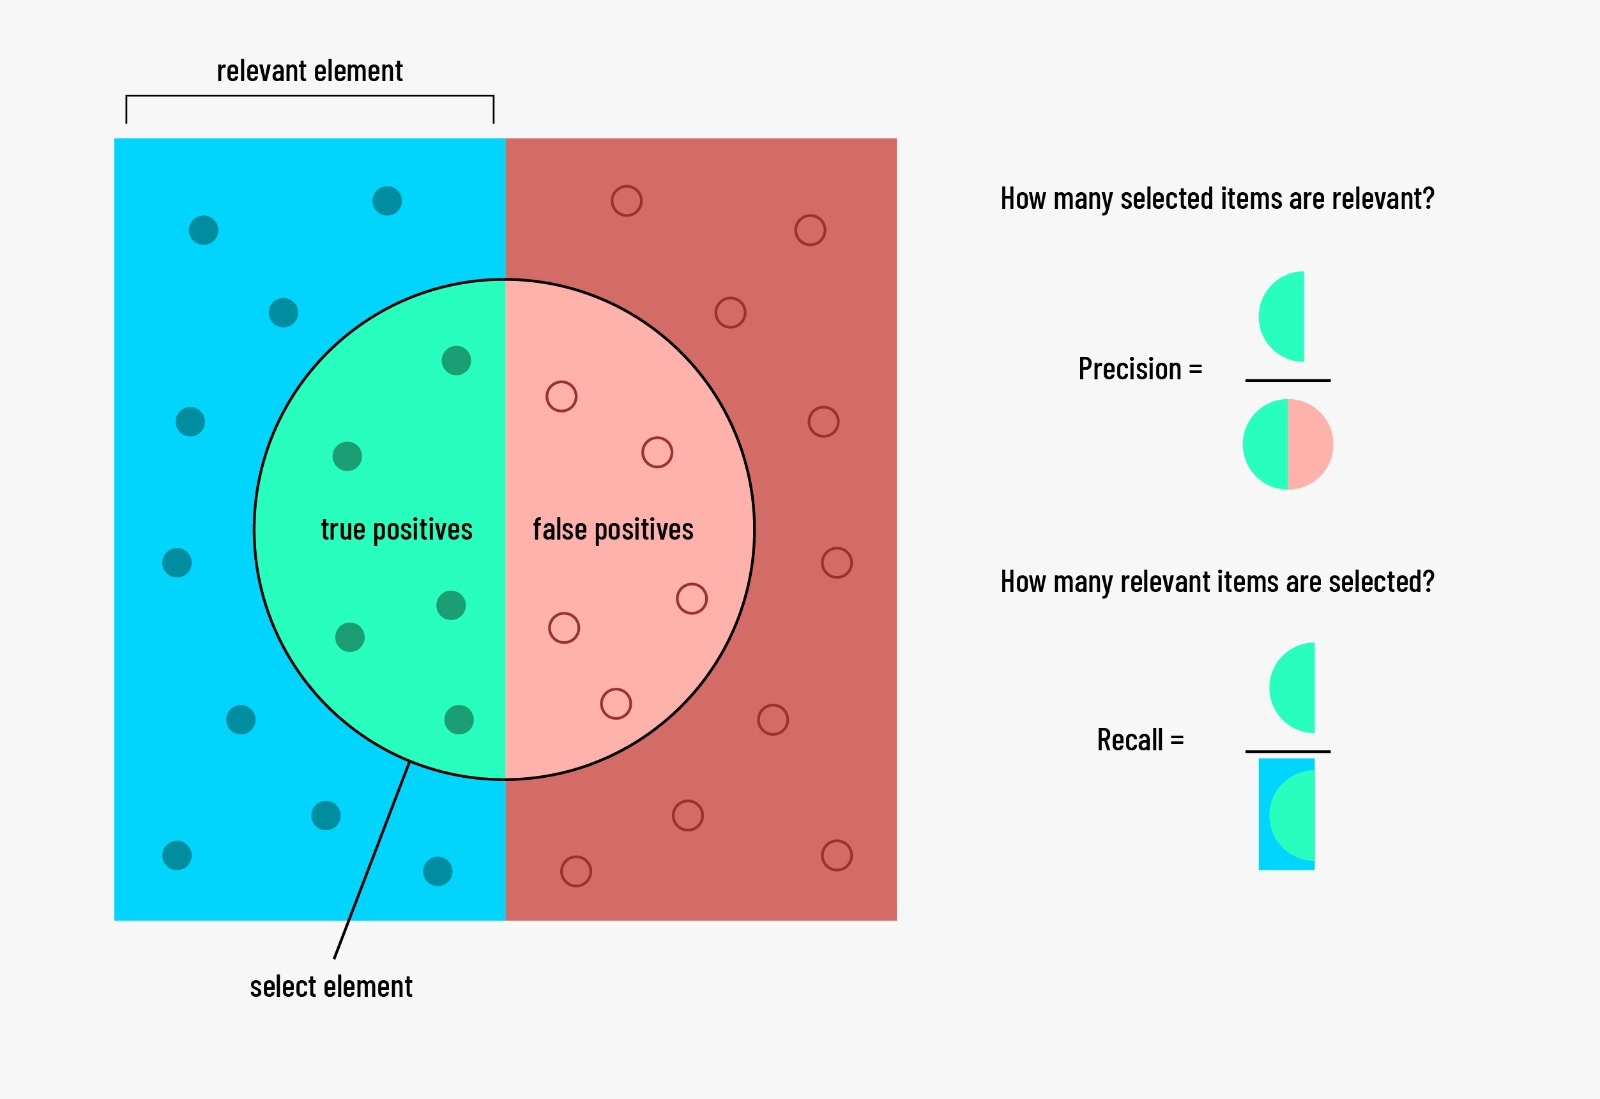

A value of *precision* equal to 1 means that every face has been labeled as known by the algorithm actually is it, but it doesn't give any information about faces actually known and labeled as unknown.

A value of *recall* equal to 1 means that every face actually known has been labeled as that by the algorithm, but it doesn't give any information about faces actually unknown and labeled as known.

The *precision* and the *recall* often are inversely proportional. When the first increases, the second decreases; and vice versa. Most of the time you have to look for an intermediate point of balance.

The following code, with a number of 16 eigenfaces, shows the values of *confusion matrix*, *precision* and *recall* of the prediction algorithm on the $DTest=Y\cup Z$. Moreover, it shows the indices of the faces that the algorithm labeled incorrectly and gives you the opportunity to see them. Finally, by entering the corresponding path, it asks if you want to predict any face outside the DTest set. You can note, that even with a such low number of eigenfaces, the precision and recall values are very high. This is due to the trivial database and its small size. 


 Theta = 2439.7867512551547


The confusion matrix is:
[399, 1]
[2, 118]
the precision is 0.9950124688279302
the recall is 0.9975


There are 1 images of known people that are predicted as unknown
They are the images of Y corresponding to the following indices
[133]


There are 2 images of unknown people that are predicted as known
They are the images of Y corresponding to the following indices
[402, 422]


The minimum distance calculated is:  2316.1891926985063
The image has been recognised as one of the database,
in particular it has been seen as a picture of the individual: s 25


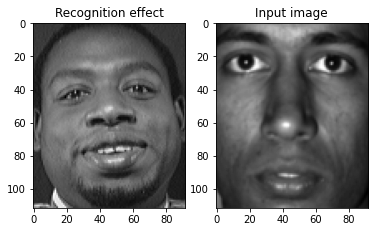

Do you want see the prediction of an image out the DTest? Write Y for yes, N for No: n
I'm going out...


In [ ]:
#take num_components eigenfaces
X_vect=asRowMatrix(X)
eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components =16)

#take the 2 databases that we need to compute theta
user_path=[]

user_path.append("/content/Database_FaceRecognition/DKnownTest")
user_path.append("/content/Database_FaceRecognition/DFaceNotKnownTheta")

#compute the projection matrix
CP=Weight_mat(eigenfaces,X_vect,mu)
 
#compute theta
thetamin=np.zeros(2)
thetamax=np.zeros(2)
for i in range(2):
    [Y,y]=read_data(user_path[i])
    Y_vect=asRowMatrix(Y)
    thetamin[i],thetamax[i],all_dist,all_index=theta(Y,mu,eigenfaces,CP,1)
    
THETA=(thetamax[0]+thetamin[1])/2

print("\n Theta =",THETA)

#read DTest
[Y,y_new]=read_data(r'/content/Database_FaceRecognition/DTest')

a=[0,0]
b=[0,0]

#compute the labels of our prediction
y_hp=[0]*np.size(Y,0)
for i in range(np.size(Y,0)):
    dmin,index,NP=min_distance_newimage(Y[i],mu,eigenfaces,CP)
    if dmin<THETA:
        y_hp[i]=0
    else:
        y_hp[i]=1 

known_err=[]
unknown_err=[]
for i in range(np.size(Y,0)):
    if y_new[i]==0:
       if  y_hp[i]==0:
           a[0]=a[0]+1
       else: 
           a[1]=a[1]+1
           known_err.append(i)
    elif y_new[i]==1:
        if  y_hp[i]==0:
            b[0]=b[0]+1
            unknown_err.append(i)
        else: 
            b[1]=b[1]+1

print("\n")
print("The confusion matrix is:")
print(a)
print(b) 

#comput precision and recall
TP=a[0]
FP=b[0]
FN=a[1]
TN=b[1]
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print('the precision is', precision)
print('the recall is', recall)

print('\n')
print('There are', a[1], 'images of known people that are predicted as unknown')
print('They are the images of Y corresponding to the following indices')
print(known_err)
print('\n')
print('There are', b[0], 'images of unknown people that are predicted as known')
print('They are the images of Y corresponding to the following indices')
print(unknown_err)

choice=input('Do you want see the prediction of an image of DTest? Write Y for yes, N for No: ')
if choice=='Y' or choice=='y':
    index=input('Inser the corresponding index: ')
    index=int(index)
    im=Y[index]

    #compute the weight vector of new image
    im=im.reshape(1,-1)
    NP=project(eigenfaces, im, mu)

    #compute the minimum distance from new image and all the images of the database
    d=np.zeros(np.size(X,0))
    for i in range(np.size(X,0)):
        d[i]=distance(NP[0],CP[i,:])
    dmin=np.amin(d)
    index=np.argmin(d)
    print("\n")
    print("The minimum distance calculated is: ", dmin)

    if (dmin<THETA):
        print("The image has been recognised as one of the database,")
        print("in particular it has been seen as a picture of the individual: s", int(index/5)+1)
    
        plt.figure();
        plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
        plt.subplot(122),plt.imshow(im.reshape(np.shape(Y[0])), plt.cm.gray),plt.title('Input image');
        plt.show()           
    else:
        print("The image has been recognised as one of a face absent in the database.")
        plt.figure();
        plt.imshow(im.reshape(np.shape(Y[0])), plt.cm.gray),plt.title('Input image');
        plt.show()

elif choice=='N' or choice=='n':
    print('ok')

choice=input('Do you want see the prediction of an image out the DTest? Write Y for yes, N for No: ')
if choice=='Y' or choice=='y':
    query_image=input('Inser the path of the image that you want predict: \n')
    im=Image.open(query_image)
    U=[]
    try:
        im = im.convert("L")
        U.append(np.asarray(im, dtype=np.uint8))
        # Management of any errors
    except IOError:
        print ("I/O error({0}): {1}")
    except:
        print ("Unexpected error:", sys.exc_info()[0])
        raise
    U=np.array(U[0])
    U=U.reshape(1 , -1)

    #compute the weight vector of new image
    NP=project(eigenfaces, U, mu)

    #compute the minimum distance from new image and all the images of the database
    d=np.zeros(np.size(X,0))
    for i in range(np.size(X,0)):
        d[i]=distance(NP[0],CP[i,:])
    dmin=np.amin(d)
    index=np.argmin(d)
    print("\n")
    print("The minimum distance calculated is: ", dmin)

    if (dmin<THETA):
        print("The image has been recognised as one of the database,")
        print("in particular it has been seen as a picture of the individual: s", int(index/5)+1)
    
        plt.figure();
        plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
        plt.subplot(122),plt.imshow(im, plt.cm.gray),plt.title('Input image');
        plt.show()           
    else:
        print("The image has been recognised as one of a face absent in the database.")
        plt.figure();
        plt.imshow(im, plt.cm.gray),plt.title('Input image');
        plt.show()
    
elif choice=='N' or choice=='n':
    print("I'm going out...") 

The following code shows the values of *precision* and *recall* as a function of the number of eigenfaces. The plot is not really meaningful because their values are very high using also a low number of eigenfaces. 

the vector of the precision is [0.9974874371859297, 0.9949874686716792, 0.9949622166246851, 0.9974811083123426, 0.9975, 0.9975, 1.0, 1.0, 0.9975, 0.9950124688279302]


the vector of the recall is [0.9925, 0.9925, 0.9875, 0.99, 0.9975, 0.9975, 1.0, 1.0, 0.9975, 0.9975]


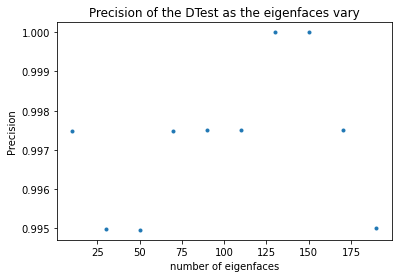

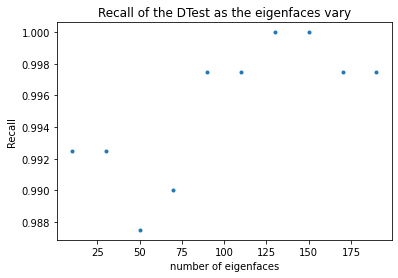

In [ ]:
#read DTest
[Y,y_new]=read_data(r'/content/Database_FaceRecognition/DTest')

#take the 2 databases that we need to compute theta
user_path=[]
user_path.append("/content/Database_FaceRecognition/DKnownTest")
user_path.append("/content/Database_FaceRecognition/DFaceNotKnownTheta")

X_vect=asRowMatrix(X)
precision_vect=[]
recall_vect=[]
for num_components in range(10,len(X)+1,20):
    
    #take num_components eigenfaces
    eigenvalues , eigenfaces , mu = pca (X_vect, y, num_components) 
    
    #compute the projection matrix
    CP=Weight_mat(eigenfaces,X_vect,mu)

    a=[0,0]
    b=[0,0]
    
    #compute theta
    thetamin=np.zeros(2)
    thetamax=np.zeros(2)
    for i in range(2):
        [W,yi]=read_data(user_path[i])
        W_vect=asRowMatrix(W)
        thetamin[i],thetamax[i],all_dist,all_index=theta(W,mu,eigenfaces,CP,1)
    THETA=(thetamax[0]+thetamin[1])/2
    
    #compute the labels of our prediction
    y_hp=[0]*np.size(Y,0)
    for i in range(np.size(Y,0)):
        dmin,index,NP=min_distance_newimage(Y[i],mu,eigenfaces,CP)
        if dmin<THETA:
            y_hp[i]=0
        else:
            y_hp[i]=1 
        
    for i in range(np.size(Y,0)):
        if y_new[i]==0:
            if  y_hp[i]==0:
                a[0]=a[0]+1
            else: 
                a[1]=a[1]+1
        elif y_new[i]==1:
            if  y_hp[i]==0:
                b[0]=b[0]+1
            else: 
                b[1]=b[1]+1

    #comput precision and recall
    TP=a[0]
    FP=b[0]
    FN=a[1]
    TN=b[1]
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    precision_vect.append(precision)
    recall_vect.append(recall)

print('the vector of the precision is', precision_vect)
print('\n')
print('the vector of the recall is',recall_vect) 

a=list(range(10,len(X)+1,20))
plt.title("Precision of the DTest as the eigenfaces vary") 
plt.xlabel("number of eigenfaces") 
plt.ylabel("Precision") 
plt.plot(a,precision_vect,'.') 
plt.show()
   
plt.title("Recall of the DTest as the eigenfaces vary") 
plt.xlabel("number of eigenfaces") 
plt.ylabel("Recall") 
plt.plot(a,recall_vect,'.') 
plt.show()

# **6. Conclusion**
---
In this particular project the algorithms work in a good way even if you use a low number of eigenfaces. This is due to the trivial and the small size of the *AT&T Database*. You can see that a number of **37 eigefaces** is the smallest value that makes the algorithms efficient.

The eigenface approach does provide a practical solution that
is well fitted to the problem of face recognition. It is fast,
relatively simple, and has been shown to work well in a
constrained environment. 
It is important to note that many applications of face
recognition do not require perfect identification, although most require a low false-positive rate, so a high *precision* value.In searching a large database of faces, for example, it may be
preferable to find a small set of likely matches to present
to the user. For applications such as security systems or
human-computer interaction, the system will normally
be able to “view” the subject for a few seconds or minutes, and thus will have a number of chances to recognize
the person. The experiments show that the eigenface
technique can be made to perform at very high accuracy,
although with a substantial “unknown” rejection rate, and
thus is potentially well suited to these applications. In other applications the eigenface approach is not efficient. The 
technology is rapidly evolving to outperform in these contexts. Neural Networks can be used to compare the millions of faces stored in the database very quickly and to allow the system to automatically learn new information useful for future analysis.

# **7. Bibliography**

---


1. [Bagli M.C. - Autovettori e riconoscimento facciale - Università di Bologna (2016);](https://amslaurea.unibo.it/12063/)
2. Brandoni D. - Autovettori e riconoscimento facciale;
3. Cichocki A., Mandic D., Phan A.H., Caiafa C., Zhou G., Zhao Q. and De Lathauwer L. - Tensor Decompositions for Signal Processing Applications From Two-way to Multiway Component Analysis;
4. Cuomo S. - La SVD e le sue applicazioni - Università degli Studi di Napoli "Federico II";
5. De Lathauwer L., Bart De Moor B. and Vandewalle J. - ​​A Multilinear Singular Value Decomposition;
6.  [Fabiani G., Panico M., Pezzella M. - Project Pluto - Università degli Studi di Napoli "Federico II" (2020); ](https://github.com/MarioPezzella/Pluto-Team/blob/master/Project%20Pluto%20-%20GF%20MP%20MP%20.ipynb)
7.  Golub G., Van Loan C. - Matrix Computation - Third edition (1996);
8. Guardo E. - Decomposizione ai valori singolari;
9. Hansen C. - The truncated SVD as a method for regularization;
10. Knezevic D. - Numerical Linear Algebra;
11. Madsen, R. E., Hansen, L. K. and Whinter, O. -  Singular Value Decomposition and Principal Component Analysis (2004);
12. Paltrinieri F. - Decomposizioni tensoriali: High Order SVD e Canonical Decomposition;
13. [SANDIPANWEB - EigenFaces and A Simple Face Detector with PCA/SVD in Python (2018);](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)
14. [Shalev-Shwartz S., Ben-David S. - Understanding Machine Learning:
From Theory to Algorithms - Cambridge University Press (2014);](http://www.datascienceassn.org/sites/default/files/Understanding%20Machine%20Learning%20-%20From%20Theory%20to%20Algorithms.pdf)
15. Sommariva A. - Sistemi lineari sovradimensionati e SVD;
16. [Samal, Sumitra S., Preeti T., P.Jyotiprakash - Assessment of PSO and PCA Algorithms for Face Recognition Using Different Performance Index Factors (2013);](https://www.ijert.org/research/assessment-of-pso-and-pca-algorithms-for-face-recognition-using-different-performance-index-factors-IJERTV2IS90894.pdf)
17. [Torres L. - Is there any hope for face recognition? - Technical University of Catalonia;](https://www.face-rec.org/interesting-papers/General/cr1182.pdf)
18. [Turk M., Pentland A. - Eigenfaces for Recognition (2001);](https://www.mitpressjournals.org/doi/pdf/10.1162/jocn.1991.3.1.71)
19. [Turk M. - A random walk through Eigenspace (2001)](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.13.6649&rep=rep1&type=pdf);
20. [Wagner P. - Face Recognition with Python (2012);](https://www.bytefish.de/pdf/facerec_python.pdf)
21. Zhang A. - Singular Value Decomposition for High-dimensional High-order Data.